<a href="https://colab.research.google.com/github/ibogorad/fastai/blob/main/FastAI_Igor_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq duckduckgo_search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 87.1 MB/s eta 0:00:00


In [2]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

In [3]:
urls = search_images('grizzly bear', max_images=1)
urls[0]

'http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg'

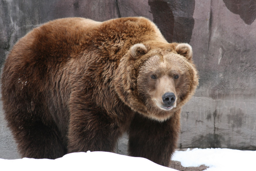

In [4]:
from fastdownload import download_url
dest = 'bear.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [5]:
#hide
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [6]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

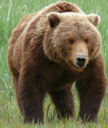

In [7]:
im = Image.open(dest)
im.to_thumb(128,128)

In [9]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [10]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        download_images(dest, urls=search_images(f'{o} bear',max_images=200))

In [11]:
fns = get_image_files(path)
fns

(#544) [Path('bears/black/d9cac80e-cc8e-48c1-9248-a008cb91c6f8.jpg'),Path('bears/black/cd5d5c6a-5e1d-4f53-90c7-75bcfc39cc9d.jpg'),Path('bears/black/86d44f85-a0e7-45f7-b4ac-0504070b5862.jpg'),Path('bears/black/979f522b-b447-45e1-b7c7-86033088f022.jpg'),Path('bears/black/ead8f80b-43e1-4e2b-84c4-c6eef9793fcc.jpg'),Path('bears/black/4f6a0116-30d9-4e9c-9d6c-8ef707a3d32d.jpg'),Path('bears/black/b9aca149-2530-4477-a3a7-042b35a3a3d8.jpg'),Path('bears/black/b3dca97b-407a-4151-9083-d25b1bee510b.jpg'),Path('bears/black/811c6209-51f3-49bd-9679-3c3d54a81172.jpg'),Path('bears/black/b8ad0202-f9ad-40d5-88d8-6d3433afcdaa.jpg'),Path('bears/black/79922eb0-3ce3-4292-8d0e-3e9824dc3dc3.jpg'),Path('bears/black/3525cc76-0803-4473-8d52-bf4e9290512a.jpg'),Path('bears/black/69178ecf-b3be-4091-914a-5ef65c6d68f4.jpg'),Path('bears/black/d69bf92d-88a6-478e-b755-81e08c0ba8a9.jpg'),Path('bears/black/a8d8371a-2a93-43bd-b3d0-ad5a4af067cf.jpg'),Path('bears/black/61b448f2-40fa-4676-a360-462a6c4d0d05.jpg'),Path('bears/blac

In [12]:
from IPython.display import display

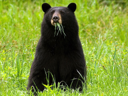

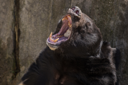

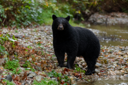

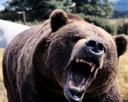

In [15]:
img0 = Image.open(fns[20]).to_thumb(128,128)
img1 = Image.open(fns[131]).to_thumb(128,128)
img2 = Image.open(fns[132]).to_thumb(128,128)
img3 = Image.open(fns[139]).to_thumb(128,128)

display(img0,img1,img2,img3)

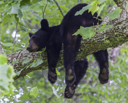

In [16]:
im = Image.open(fns[2])
im.to_thumb(128,128)

In [17]:
failed = verify_images(fns)
failed

(#28) [Path('bears/black/3525cc76-0803-4473-8d52-bf4e9290512a.jpg'),Path('bears/black/ce8510c1-97c5-41cb-9117-e52ce20eef94.jpg'),Path('bears/black/909ec048-06e7-47a5-b077-840b5a2281e3.jpg'),Path('bears/black/dee5d8aa-cf71-4204-91cb-40bb2b3e528d.jpg'),Path('bears/black/dc04208f-861d-4cc3-aa20-2cd6a0348627.JPG'),Path('bears/black/f4aa2d2e-74d2-44a6-b5e9-32eb934c854e.jpg'),Path('bears/black/761a0153-2e7e-4027-b2d6-0f7f2464b532.jpg'),Path('bears/black/d53b1076-8408-4691-821d-b2fd6fe91608.jpg'),Path('bears/black/1f37c6d5-0792-4bb1-a5ea-2b9e2e374f86.JPG'),Path('bears/black/aa626ef1-0686-4184-90fe-7a79ffe50e70.jpg'),Path('bears/black/c7079b71-d3c9-4b86-aeff-836ed44ed5df.jpg'),Path('bears/black/87d9e554-f16e-4240-9bb3-7a9704e987ad.jpg'),Path('bears/grizzly/4dc494a2-6657-490e-8c35-b751890564c0.jpg'),Path('bears/grizzly/75681107-86ec-4b42-a088-6a93d2d8beed.jpg'),Path('bears/grizzly/fb4b5c61-f5f8-4bd4-ac59-69104260f23a.jpg'),Path('bears/grizzly/2358d458-a695-447e-89e5-e32dbfcd780d.jpg'),Path('bea

In [18]:
len(failed)

28

In [19]:
failed.map(Path.unlink);

In [ ]:
??verify_image

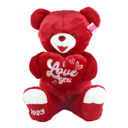

In [20]:
im = Image.open(fns[400])
im.to_thumb(128,128)

In [21]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [22]:
dls = bears.dataloaders(path)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


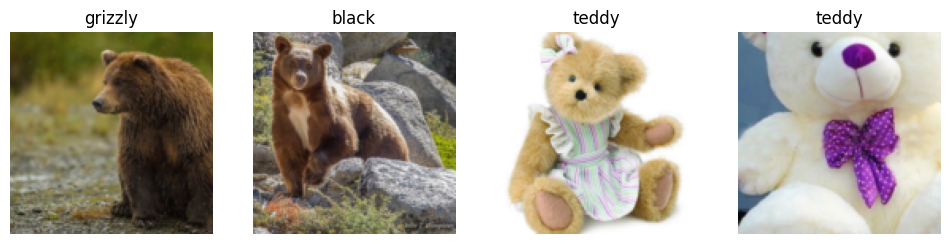

In [23]:
dls.valid.show_batch(max_n=4, nrows=1)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


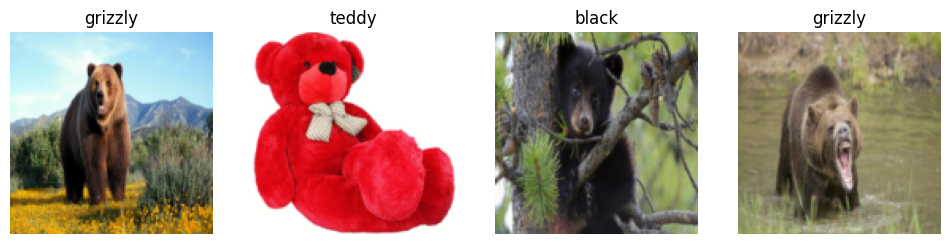

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

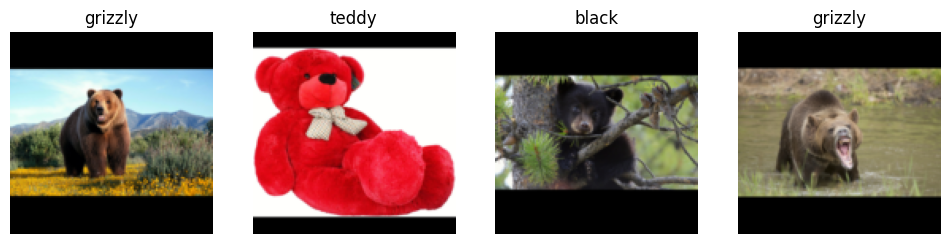

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [24]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [25]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 226MB/s]


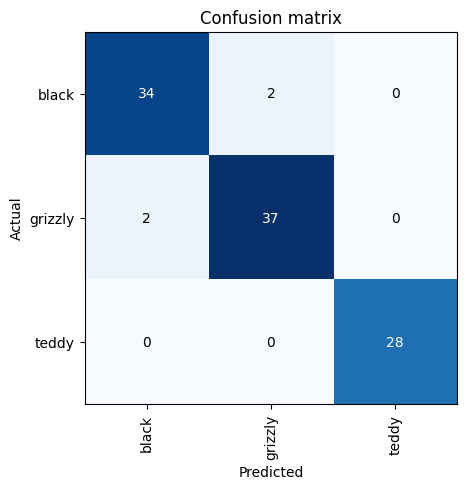

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

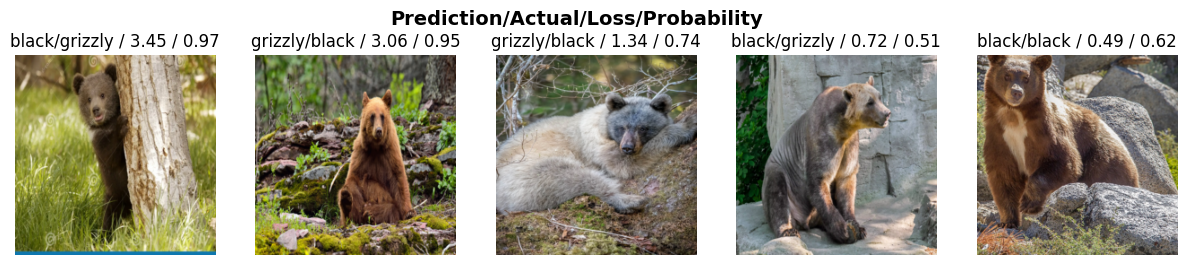

In [27]:
interp.plot_top_losses(5, nrows=1)

In [31]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [32]:
from fastbook import *

In [34]:
from fastai.vision.widgets import *

In [35]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [36]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()


In [37]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)


In [38]:
learn.export()

In [39]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [40]:
learn_inf = load_learner(path/'export.pkl')

In [41]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([6.7726e-04, 9.9931e-01, 1.3430e-05]))

In [42]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [48]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [55]:
img = PILImage.create(btn_upload.data[-1])

In [56]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [51]:
pred,pred_idx,probs = learn_inf.predict(img)

In [52]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: teddy; Probability: 0.9997')

In [53]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [54]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [57]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [58]:
#hide_output
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [59]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 6.5.5 requires jupyter-client<8,>=5.3.4, but you have jupyter-client 8.6.3 which is incompatible.
Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila 0.5.8 OK
